In [194]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt

import scipy.stats as ss

mymodules = os.fspath('../modules')
if mymodules not in sys.path:
    sys.path.append(mymodules)
    
import relaxometry as r
import importlib
r = importlib.reload(r)


%matplotlib inline

In [166]:
folders = {}
folders['main'] = '/mnt/c/Users/felix/OneDrive/WORK/2019ETH/Analysis'   
folders['excel'] = r'AllDimitir_WM_GM_ for_C6_T6_Fsc.xlsx'   # I add comments in there

df = r.getExcel(os.path.join(folders['main'],folders['excel']))
df = r.cleanup_dimitri(df)

# also insert BBB behavioral data:
folders['BBB'] = r'/mnt/c/Users/felix/OneDrive/WORK/2019ETH/Analysis/FromZsofia/Copy of Budde_SCIDTI_Cohort1_Data.xlsx'
df = r.insert_BBB_data(df, folders['BBB'])

df.head()

,location_estimate,slice_number,horizontal_cross_sec,vertical_cross_sec,GM_area_cm2,GM_voxel,GM_mean,sd_gm,minimum_gm,maximum_gm,...,minimum_wm,maximum_wm,comments,group,date,id,acquisition,scan,BBB_day1,BBB_day84
0,T6,12.0,2.84,2.68,0.02,269.0,1650.0,138.00,1450.0,2560.0,...,0.0,4650.0,NaN,sev,20181218,198,T1,E8,1.5,11.0
1,T6,12.0,NaN,NaN,0.02,380.0,51.8,6.76,0.0,67.4,...,0.0,175.0,NaN,sev,20181218,198,T2,E9,1.5,11.0
2,T6,12.0,2.95,2.42,0.02,242.0,1560.0,140.00,692.0,2220.0,...,0.0,3080.0,NaN,sev,20181219,198,T1,E7,1.5,11.0
3,T6,12.0,NaN,NaN,0.02,391.0,102.0,49.80,0.0,359.0,...,0.0,611.0,NaN,sev,20181219,198,T2,E8,1.5,11.0
4,T6,28.0,3.05,2.35,0.02,228.0,1540.0,352.00,0.0,2620.0,...,0.0,3180.0,NaN,mod,20181128,210,T1,E7,8.0,21.0


In [137]:
# display details of a specific animal:
df[(df['id'] == 196)]
df.columns

Index(['location_estimate', 'slice_number', 'horizontal_cross_sec',
       'vertical_cross_sec', 'GM_area_cm2', 'GM_voxel', 'GM_mean', 'sd_gm',
       'minimum_gm', 'maximum_gm', 'WM_area_cm2', 'WM_voxel', 'WM_mean',
       'sd_wm', 'minimum_wm', 'maximum_wm', 'comments', 'group', 'date', 'id',
       'acquisition', 'scan', 'BBB_day1', 'BBB_day84'],
      dtype='object')

In [196]:
selection = {}
selection['contrast'] = 'T2'
selection['segment'] = 'T6'


# Select columns of general interest of data for analysis
columns = ['group', 'id', 'GM_mean','GM_voxel','WM_voxel','WM_mean',
           'horizontal_cross_sec', 'vertical_cross_sec',
           'BBB_day1','BBB_day84']


testcols = ['WM_mean', 'GM_mean', 'WM_voxel', 'WM_mean'] # for which columns should outliers be removed/replaced by NaN?
df_selection = r.contrast_segment_selection(df, selection, columns)
df_selection = r.outlier_removal(df_selection, df, testcols, SD_cutoff=2)

df_selection.head()

Any NaNs?  True
removed outliers for column: WM_mean 
   comments   id
5      NaN  210
removed outliers for column: GM_mean 
   comments   id
5      NaN  210
removed outliers for column: WM_voxel 
           comments   id
57  some artifacts  202
removed outliers for column: WM_mean 
   comments   id
3      NaN  198
5      NaN  210


,group,id,GM_mean,GM_voxel,WM_voxel,WM_mean,horizontal_cross_sec,vertical_cross_sec,BBB_day1,BBB_day84
1,sev,198,51.8,380.0,954.0,55.9,NaN,NaN,1.5,11.0
3,sev,198,102.0,391.0,974.0,NaN,NaN,NaN,1.5,11.0
5,mod,210,NaN,379.0,895.0,NaN,NaN,NaN,8.0,21.0
9,mod,213,59.3,318.0,807.0,64.9,NaN,NaN,8.0,17.0
15,mod,214,52.8,328.0,963.0,60.0,NaN,NaN,12.0,16.0


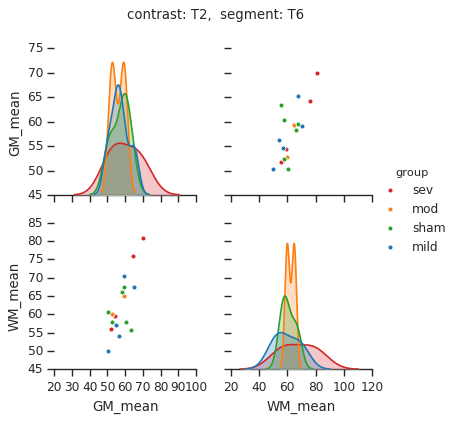

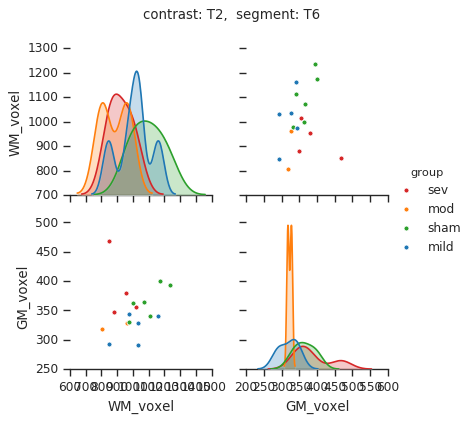

In [25]:
# Not really meaningful anymore... main purpose would be to check for correlations between several variables.

import seaborn as sns

sns.set(style="ticks")

def pairplot_singleDF(df_selection, selection, columns):
    # sns.palplot(sns.color_palette())  # visualize the current palette
    defpal = sns.color_palette("tab10")
    newPal = dict(sham = defpal[2], mild = defpal[0], mod = defpal[1], sev = defpal[3])


    df_plot = df_selection.drop(['id'], axis=1)

    # optional code to demean data columns:
    # df_plot = df_selection.drop(['id','group'], axis=1)
    # df_plot = df_plot - df_plot.mean() 
    # df_plot['group'] = df_selection['group']

#     sns.set(style="ticks", font_scale=1.2)
    # ax = sns.pairplot(df_plot, hue="group", kind="reg")
    ax = sns.pairplot(df_plot, hue="group", vars=columns, palette=newPal)
    sns.despine(trim=True, left=True)
    ax.fig.suptitle(f"contrast: {selection['contrast']},  segment: {selection['segment']}", y=1.05);
    plt.show()          
                    
pairplot_singleDF(df_selection, selection, ['GM_mean','WM_mean'])     
pairplot_singleDF(df_selection, selection, ['WM_voxel','GM_voxel'])
if selection['contrast'] == 'T1':
    pairplot_singleDF(df_selection, selection, ['horizontal_cross_sec','vertical_cross_sec'])       

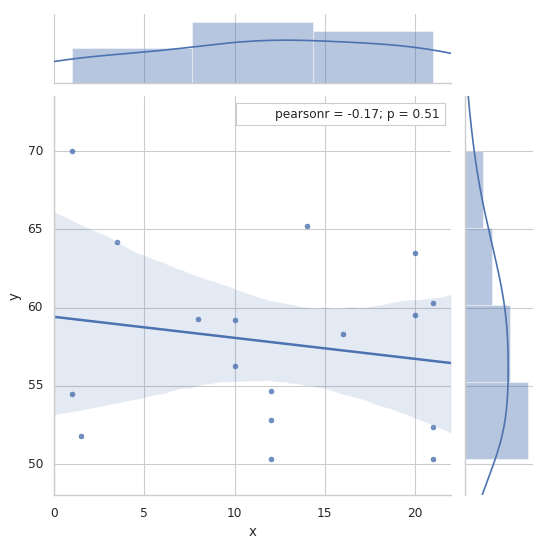

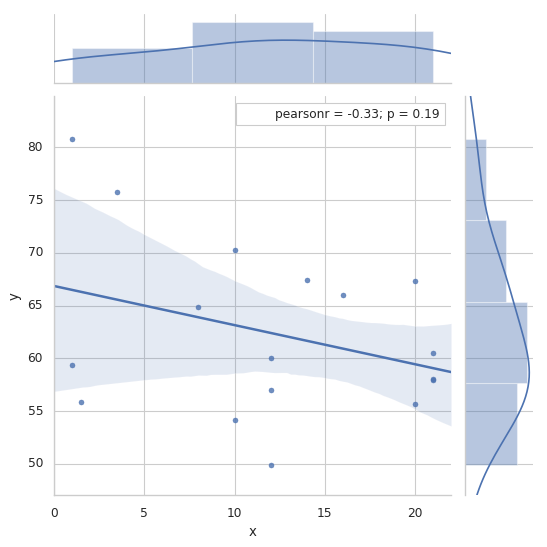

In [157]:
# Alternatively use BBB scores instead of cateogries

import scipy.stats as stats
import warnings

def jointplot_corr(df, x, y):
    warnings.filterwarnings("ignore")
    g = sns.jointplot(x, y, data=df, kind="reg", color="b", height=7,
                       xlim=(df[x].min()-1, df[x].max()+1),
                       ylim=(np.round(0.95*df[y].min()), 1.05*df[y].max()))
#                         .set_axis_labels("x", "y")) #add ( at beginning (sns...
    g.annotate(stats.pearsonr)
    plt.show()

jointplot_corr(df_selection, 'BBB_day1', 'GM_mean')
jointplot_corr(df_selection, 'BBB_day1', 'WM_mean')
                        
# jointplot_corr(df_selection, 'BBB_day84', 'GM_mean')  # <-- values skewed to 21, not useful.
# jointplot_corr(df_selection, 'BBB_day84', 'WM_mean')

# jointplot_corr(df_selection, 'BBB_day1', 'GM_voxel')
# jointplot_corr(df_selection, 'BBB_day1', 'WM_voxel')



In [21]:
import matplotlib.style as mps
print(mps.available)

# mps.use('fivethirtyeight') 
# mps.use('') 

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']


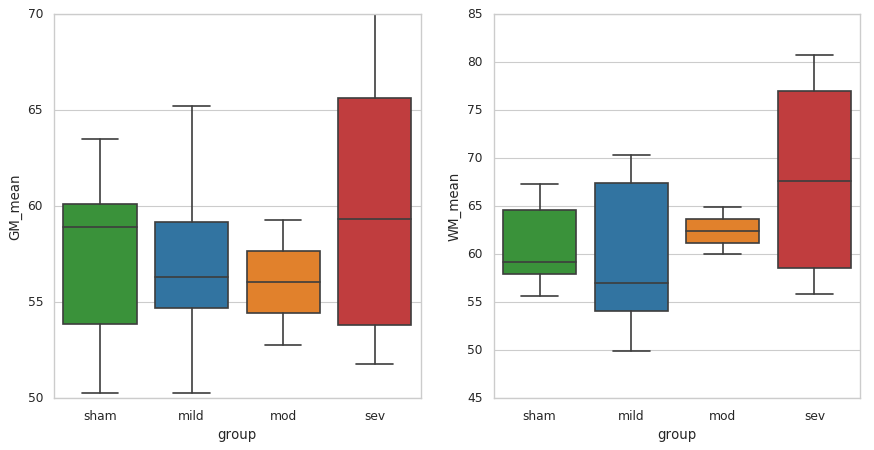

ANOVA for GM_mean: F = 0.27662963938975726, p = 0.8412456608182854
ANOVA for WM_mean: F = 0.8578115085206979, p = 0.4873015916431058


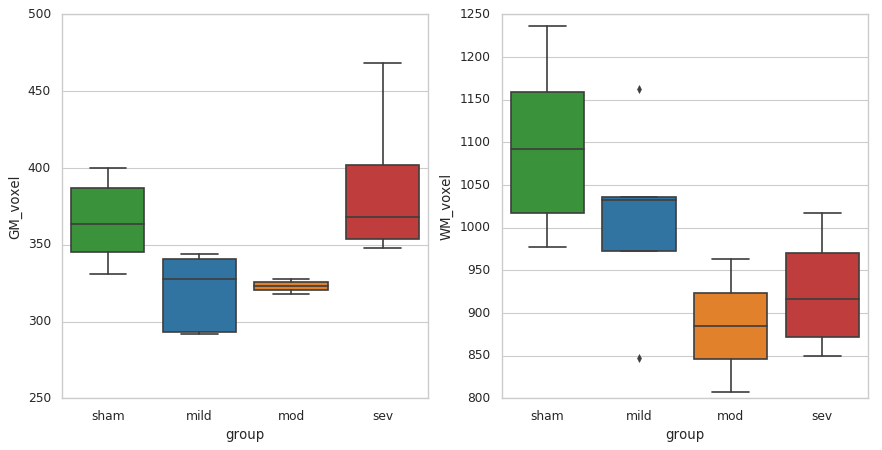

ANOVA for GM_voxel: F = 3.6644203836762723, p = 0.04115214362014575
ANOVA for WM_voxel: F = 3.3963347708885916, p = 0.05055558327872449


In [152]:
# pandas does not allow order of boxes to be modiefied (sham, mild, etc...)
# def boxplots_horizontal2(df, columnsOfInterest, xgroup='group'):
#     fig, ax = plt.subplots(1, len(columnsOfInterest), figsize=(13, 6))
#     for i, columni in enumerate(columnsOfInterest):
#         df.boxplot(column = columni, by = xgroup, ax=ax[i], fontsize=14, grid=True)
#     plt.show()

    
def boxplots_horizontal(df, columnsOfInterest, xgroup='group'):
    sns.set(style="whitegrid")
    defpal = sns.color_palette("tab10")
    newPal = dict(sham = defpal[2], mild = defpal[0], mod = defpal[1], sev = defpal[3])
    
    fig, ax = plt.subplots(1, len(columnsOfInterest), figsize=(13, 6))
    for i, columni in enumerate(columnsOfInterest):
        sns.boxplot(ax=ax[i], x="group", y=columni, data=df, order=['sham', 'mild', 'mod', 'sev'], palette=newPal)
#     ax = sns.swarmplot(x="group", y="GM_mean", data=df, color=".25", order=['sham', 'mild', 'mod', 'sev'])
    plt.show()
    
    
# ANOVA
def simple_anovas(df, columnsOfInterest, groupy='group'):
    for columni in columnsOfInterest:
        groupedData = df.groupby(groupy)[columni].apply(list)
#         print(groupedData)
        F, p = ss.f_oneway(*groupedData)
        print(f"ANOVA for {columni}: F = {F}, p = {p}")
    
    
# execute this for each line
columnsOfInterest = ['GM_mean', 'WM_mean']
boxplots_horizontal(df_selection, columnsOfInterest) 
simple_anovas(df_selection, columnsOfInterest)

columnsOfInterest = ['GM_voxel', 'WM_voxel']
boxplots_horizontal(df_selection, columnsOfInterest)
simple_anovas(df_selection, columnsOfInterest)

if selection['contrast'] == 'T1':
    columnsOfInterest = ['horizontal_cross_sec', 'vertical_cross_sec']
    boxplots_horizontal(df_selection, columnsOfInterest)
    simple_anovas(df_selection, columnsOfInterest)

In [29]:
from ipywidgets import interact


def f(x):
    print(f'contrast is: {x}')

interact(f, x=[('T1', 'T1'), ('T2', 'T2')]);

interactive(children=(Dropdown(description='x', options=(('T1', 'T1'), ('T2', 'T2')), value='T1'), Output()), …

In [32]:
# statsmodels doesnt work for this kind of data... see mord or sklearn...
# https://stackoverflow.com/questions/38549756/how-can-i-do-ordinal-regression-using-the-mord-module-in-python

import statsmodels.api as sm
from patsy import dmatrices


# df_selection = df_selection.dropna()

y, X = dmatrices("group ~ rm_gm + area_pu_gm + area_pu_wm + rm_wm", data=df_selection, NA_action='drop', return_type='dataframe')


mod = sm.OLS(y, X) # Describe model

res = mod.fit()  # Fit model

print(res.summary())  #Summarize model

/home/felix/miniconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


ValueError: shapes (16,4) and (16,4) not aligned: 4 (dim 1) != 16 (dim 0)